In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error

In [2]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode().values[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode().values[0], inplace=True)

df.drop(columns=['deck', 'alive'], inplace=True)

In [9]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.head

,sex,embarked,class,who,adult_male,embark_town,alone
0,male,S,Third,man,True,Southampton,False
1,female,C,First,woman,False,Cherbourg,False
2,female,S,Third,woman,False,Southampton,True


In [10]:
encoder = LabelEncoder()

for col in df_cat.columns:
    df_cat[col] = encoder.fit_transform(df_cat[col])
df[df_cat.columns] = df_cat

In [11]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1


In [12]:
train, test = train_test_split(df, random_state=42)

train_y = train['survived']
train_x = train.copy()
train_x.drop(columns=['survived'], inplace=True)

valid = test['survived']
test.drop(columns=['survived'], inplace=True)

In [13]:
model = RandomForestClassifier()

In [14]:
model.fit(train_x, train_y)
pred = model.predict(test)

In [15]:
print("정확도 : ", accuracy_score(pred,valid))

정확도 :  0.7982062780269058


### 3구간

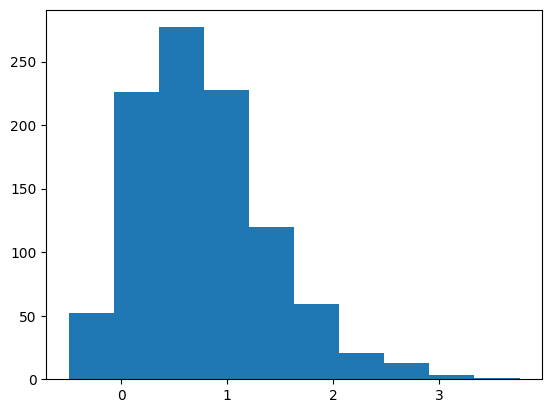

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [17]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


##### pvalue 값이 2.3e-16 이므로 유의수준 5%에서 귀무가설인 데이터가 정규성을 가진다는 기각하고 데이터는 정규성을 가지지 않는다

In [19]:
df_log = np.log1p(df)

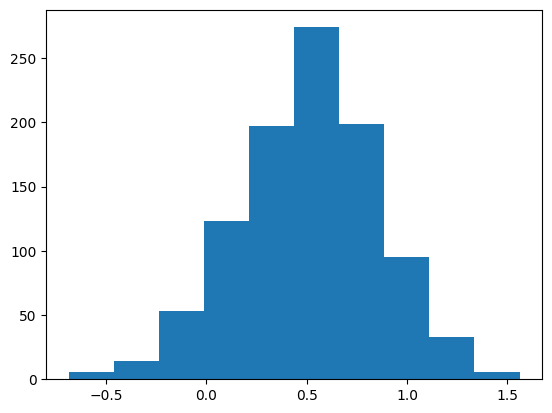

In [21]:
plt.hist(df_log)
plt.show()

In [20]:
from scipy.stats import shapiro
shapiro(df_log)

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)

##### pvalue 값이 0.17 이므로 유의수준 5%에서 귀무가설인 데이터가 정규성을 가진다는 기각하지않고 데이터는 정규성을 가진다

In [24]:
df

,data
0,0.880145
1,-0.021619
2,0.509888
3,0.179442
4,0.493778
...,...
995,-0.229930
996,0.087762
997,0.651349
998,2.489877


### 카이제곱 독립성 검정

In [25]:
from scipy.stats import chi2_contingency

# 남성과 여성의 인구 수
total_male = 600
total_female = 550

# 남성과 여성 중 흡연자의 비율
smoking_ratio_male = 0.2
smoking_ratio_female = 0.26

# 흡연자와 비흡연자의 인구 수 계산
smoking_male = int(total_male * smoking_ratio_male)
non_smoking_male = int(total_male - smoking_male)

smoking_female = total_female * smoking_ratio_female
non_smoking_female = total_female - smoking_female

In [26]:
# 데이터 배열 생성 (빈도로 변환)
data = np.array([[smoking_male, non_smoking_male], [smoking_female, non_smoking_female]])

In [27]:
# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(data)

In [28]:
print('기각',p_val)

기각 0.018786854975740765


### 회귀 분석  

In [31]:
import statsmodels.api as sm

import pandas as pd 
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p7.csv')
df.head()

,age,Cholesterol,weight
0,65,69.0,111.0
1,54,117.0,81.0
2,61,86.2,72.0
3,57,76.0,78.0
4,62,160.0,61.0


In [34]:
X = sm.add_constant(df[['age', 'Cholesterol']]) 
model = sm.OLS(df['weight'], X)
ans = model.fit()


print(ans.params['age'])

-0.03610166914386536


In [35]:
pred = ans.predict([1,55,72.6])
print(pred)

[78.85771011]


In [55]:
import pandas as pd 
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p3_1.csv')
df.head()

,ID,height
0,user_1,164.57
1,user_2,174.99
2,user_3,171.41
3,user_4,162.47
4,user_5,167.11


In [58]:
from scipy.stats import zscore

mean = np.round(np.mean(df.height),3)
print(mean)

ans = df['height'].mean()
print(ans)

169.937
169.93727272727273


In [62]:
# t분포 양쪽 꼬리에서의 t 값을 구하여라 (반올림하여 소수4째자리까지)
from scipy.stats import t

std = np.std(df.height)
n = len(df.height)

# 신뢰수준, 자유도
confidence_level = 0.95
ddof = n - 1

# t 분포의 양쪽 꼬리에서의 t값
t_value = round(t.ppf((1 + confidence_level) / 2, ddof),4)
print(t_value)

2.0049


In [41]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3_1.csv')
df.head()

,Target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21
0,21.650072,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,...,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1.465649
1,-19.469855,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,...,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0.738467,0.171368
2,-24.475600,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0.324084,...,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,-0.479174,-0.185659,-1.106335
3,13.476831,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,0.361396,1.538037,...,-2.619745,0.821903,0.087047,-0.299007,0.091761,-1.987569,-0.219672,0.357113,1.477894,-0.518270
4,3.505322,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,0.097078,0.968645,-0.702053,...,-1.463515,0.296120,0.261055,0.005113,-0.234587,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286


In [47]:
max = df.corr()['Target'].abs().sort_values().values[-2]
print(max)

0.6270251925517436


In [53]:
# Target 변수를 종속변수로 하여 다중선형회귀모델링을 진행했을 때 v2 컬럼의 회귀 계수는?
import statsmodels.api as sm

df_x = df.drop(columns=['Target'])
X = sm.add_constant(df_x)


model = sm.OLS(df['Target'], X)

ans = model.fit()

print(ans.params['v2'])

6.4403013648430685


In [54]:
# 회귀 계수들이 가지는 p값들 중 최대 값은?
r = ans.pvalues.max()
print(r)

0.9265545986907606
